<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center>Проект: Анализ резюме из HeadHunter</center> 

In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(seed=123456)
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:,.4f}'.format

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

*Решение должно использовать только пройденный материал: переменные, основные структуры данных (списки, словари, множества), циклы, функции, библиотеки numpy, pandas, matplotlib, seaborn, plotly.*

# Исследование структуры данных <a id="introduction">

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv('data/dst-3.0_16_1_hh_database.zip', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
pd.concat([df.head(2), df.tail(2)])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
print('Shape:', df.shape, end='\n')
print('Size:', np.round(df.memory_usage(deep=True).sum()/1_048_576, 2).astype('U') + ' MB')
pd.DataFrame({'dtype': df.dtypes, 'obs': df.count()})

Shape: (44744, 12)
Size: 531.07 MB


,dtype,obs
"Пол, возраст",object,44744
ЗП,object,44744
Ищет работу на должность:,object,44744
"Город, переезд, командировки",object,44744
Занятость,object,44744
График,object,44744
Опыт работы,object,44576
Последнее/нынешнее место работы,object,44743
Последняя/нынешняя должность,object,44742
Образование и ВУЗ,object,44744


4. Обратите внимание на информацию о числе непустых значений.

In [5]:
pd.DataFrame({
    'dtype': df.dtypes, 
    'obs': df.count(), 
    'nulls': df.isna().sum()
    }).query("obs != @df.shape[0]")

,dtype,obs,nulls
Опыт работы,object,44576,168
Последнее/нынешнее место работы,object,44743,1
Последняя/нынешняя должность,object,44742,2


5. Выведите основную статистическую информацию о столбцах.


In [6]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split(' ')[:2]).replace('образование', '').strip().lower())
df = df.drop(columns='Образование и ВУЗ')
df['Образование'].value_counts().to_frame()

,Образование
высшее,33863
среднее специальное,5765
неоконченное высшее,4557
среднее,559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
df['Пол'] = df['Пол, возраст'].apply(lambda x: x.split(',')[0][:1])
df['Возраст'] = df['Пол, возраст'].apply(lambda x: x.split(',')[1].strip()[:2]).astype('int')
df = df.drop(columns=['Пол, возраст'])
df['Пол'].value_counts(normalize=True).to_frame()*100

,Пол
М,80.9293
Ж,19.0707


In [9]:
df['Возраст'].mean().round(1)

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
max_len = len('Опыт работы XX года XX месяцев')

def identify_work_exp(string, max_len):
    years, months = 0, 0
    if string == 'Не указано' or pd.isna(string):
        age = np.nan
    else:
        string = string[:max_len]
        if 'год' in string or 'лет' in string:
            pos = max(string.find('год'), string.find('лет'))
            years = int(string[pos-3:pos-1])
        if 'месяц' in string:
            pos = string.find('месяц')
            months = int(string[pos-3:pos-1])
        age = years*12 + months
    return age

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(identify_work_exp, max_len=max_len)
df = df.drop(columns='Опыт работы')
df['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
def extract_city(string):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 
        'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
    ]
    string = string.split(' , ')[0]
    if string == 'Москва':
        return 'Москва'
    elif string == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif string in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

df['Город'] = df['Город, переезд, командировки'].apply(extract_city)
df['Город'].value_counts() / df.shape[0]

Москва             0.3715
другие             0.3543
город-миллионник   0.1639
Санкт-Петербург    0.1103
Name: Город, dtype: float64

In [12]:
def extract_reloc(string):
    string = string.split(' , ')
    if 'м. ' in string[1]:
        string = string[2]
    else:
        string = string[1]
    if 'не готов' in string:
        return False
    else:
        return True

df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(extract_reloc)
df['Готовность к переезду'].value_counts()

False    28719
True     16025
Name: Готовность к переезду, dtype: int64

In [13]:
def extract_work_travel(string):
    string = string.split(' , ')
    if 'м. ' in string[1]:
        del string[1]
    if len(string) == 2:
        return False
    string = string[-1] 
    if 'не готов' in string:
        return False
    else:
        return True

df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(extract_work_travel)
df['Готовность к командировкам'].value_counts()

True     31646
False    13098
Name: Готовность к командировкам, dtype: int64

In [14]:
df = df.drop(columns=['Город, переезд, командировки'])
np.round(df.query("`Готовность к переезду` == True & `Готовность к командировкам` == True").shape[0] / df.shape[0] * 100)

32.0

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:  
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg width='45%' height='45%'>  
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [15]:
df = pd.concat([
    df, 
    df['Занятость'].str.get_dummies(sep=', ').astype('bool'), 
    df['График'].str.get_dummies(sep=', ').astype('bool')
    ], axis='columns')
df = df.drop(columns=['Занятость', 'График'])

col_names = []
for col in df.columns:
    if col.startswith('ЗП'):
        col_names.append(col)
    else:
        col_names.append(col.capitalize())
df.columns = col_names

pd.concat([df.head(1), df.tail(1)])

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Волонтерство,Полная занятость,Проектная работа,Стажировка,Частичная занятость,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0000,...,False,True,True,False,True,True,True,True,True,True
44743,120000 руб.,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,высшее,М,38,190.0000,...,False,True,False,False,False,False,False,True,False,False


In [16]:
print(df.query("`Волонтерство` == True & `Проектная работа` == True").shape[0], df.query("`Вахтовый метод` == True & `Гибкий график` == True").shape[0])

436 2311


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.  
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg width='35%' height='35%'>  
Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [17]:
fx = pd.read_csv('data/ExchangeRates.csv', sep=',')
fx['close'] = fx['close'] / fx['proportion']
fx = fx.drop(columns=['per', 'time', 'vol', 'proportion'])
fx['date'] = pd.to_datetime(fx['date']).dt.date
pd.concat([fx.head(2), fx.tail(2)])

,currency,date,close
0,USD,2017-12-29,57.6291
1,USD,2017-12-30,57.6002
5662,AZN,2019-05-12,37.8396
5663,AZN,2019-06-12,37.6148


In [18]:
print(np.sort(fx['currency'].unique().tolist()), 
    np.sort(df['ЗП'].str.split(' ', expand=True)[1].unique().tolist()), sep='\n'
)

df[['ЗП (валюта)', 'Валюта']] = df['ЗП'].str.split(' ', expand=True)
df['Валюта'] = df['Валюта'].replace({
    'бел.руб.':'BYN',
    'грн.':'UAH',
    'сум':'UZS',
    'руб.':'RUB'
})

['AZN' 'BYN' 'EUR' 'KGS' 'KZT' 'UAH' 'USD' 'UZS']
['AZN' 'EUR' 'KGS' 'KZT' 'USD' 'бел.руб.' 'грн.' 'руб.' 'сум']


In [19]:
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date
df = df.merge(fx, how='left', left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], validate="many_to_one")

df['ЗП (руб)'] = np.nan
df.loc[(df['Валюта'] == 'RUB'), 'ЗП (руб)'] = df['ЗП (валюта)'].astype('int')
df.loc[(df['Валюта'] != 'RUB'), 'ЗП (руб)'] = df['ЗП (валюта)'].astype('int') * df['close']

display(df[df['Валюта'] != 'RUB'].head(2))
print('Median wage:', df['ЗП (руб)'].median() / 1_000)
df = df.drop(columns=['ЗП', 'ЗП (валюта)', 'Валюта', 'currency', 'date', 'close'])

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Гибкий график,Полный день,Сменный график,Удаленная работа,ЗП (валюта),Валюта,currency,date,close,ЗП (руб)
30,3000 бел.руб.,Engineer,Outsourcing,Data Engineer,2019-04-26,Не указано,высшее,Ж,31,98.0000,...,False,True,False,False,3000,BYN,BYN,2019-04-26,30.6320,"91,896.0000"
81,160000 KZT,"Системный администратор, веб-программист",Sailet,Менеджер по управлению проектами,2019-04-22,Не указано,неоконченное высшее,М,20,23.0000,...,False,True,False,False,160000,KZT,KZT,2019-04-22,0.1687,"26,988.8000"


Median wage: 59.019


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

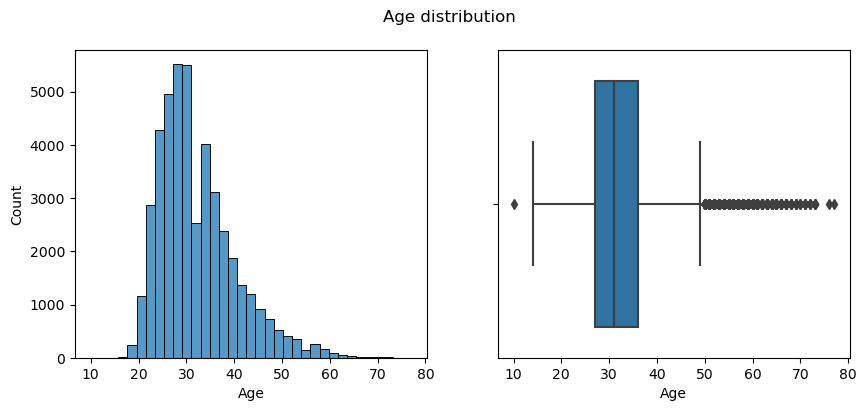

In [20]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=df, x=df['Возраст'], bins=35, ax=ax1).set(xlabel='Age')
sns.boxplot(data=df, x=df['Возраст'], ax=ax2).set(xlabel='Age')
fig.suptitle('Age distribution');

In [21]:
print('Mean age:', np.round(df['Возраст'].mean(), 1))
print('Median age:', np.round(df['Возраст'].median(), 1))
print('Mode age:', np.round(df['Возраст'].mode()[0], 1))
print('Min-max age:', np.round(df['Возраст'].min(), 1), '-', np.round(df['Возраст'].max(), 1))
print('IRQ:', np.round(df['Возраст'].quantile(0.25), 1), '-', np.round(df['Возраст'].quantile(0.75), 1))

Mean age: 32.2
Median age: 31.0
Mode age: 30
Min-max age: 10 - 77
IRQ: 27.0 - 36.0


*Выводы:*  
Большинство соискателей имеют возврат от 27 до 36 лет. При этом так как средний возраст (32,2 года) больше медианного возраста (31 год), а последний больше модального возраста (30 лет), распределение имеет положительную асимметрию, при котором правый хвост значительно длиннее левого. С учетом изложенного, к выбросам в левой части распределения можно отнести минимальное значение (10 лет), а с правой соискателей -- с возрастом более четырех стандартных отклонений от среднего возраста (около 64 лет).

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

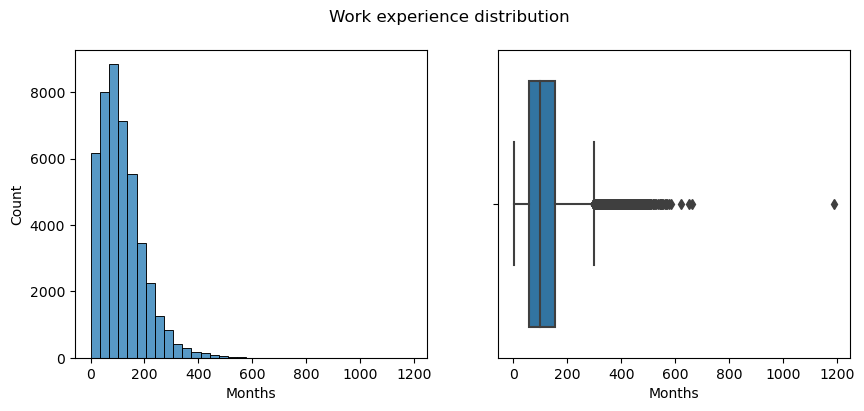

In [22]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=df, x=df['Опыт работы (месяц)'], bins=35, ax=ax1).set(xlabel='Months')
sns.boxplot(data=df, x=df['Опыт работы (месяц)'], ax=ax2).set(xlabel='Months')
fig.suptitle('Work experience distribution');

In [23]:
print('Mean exp:', np.round(df['Опыт работы (месяц)'].mean()))
print('Median exp:', np.round(df['Опыт работы (месяц)'].median()))
print('Mode exp:', np.round(df['Опыт работы (месяц)'].mode()[0]))
print('Min-max exp:', np.round(df['Опыт работы (месяц)'].min()), '-', np.round(df['Опыт работы (месяц)'].max()))
print('IRQ:', np.round(df['Опыт работы (месяц)'].quantile(0.25)), '-', np.round(df['Опыт работы (месяц)'].quantile(0.75)))

Mean exp: 114.0
Median exp: 100.0
Mode exp: 81.0
Min-max exp: 1.0 - 1188.0
IRQ: 57.0 - 154.0


*Выводы:*  
С учетом возраста соискателей, распределение их опыта работа в целом имеет схожее распределение за исключением явного выброса со значением 1188 месяцев. Большинство соискателей имеют опыт работы от 57 до 154 месяцев (~5-13 лет). Значение среднего опыта работы составляет 114 месяцев (9,5 лет), модального - 81 месяц (6,75 лет). Так как в выборке присутствуют молодые соискатели в левой части распределения имеются значения опыта работы близкие к нулю, но которые сложно отнести к выбросам. В правой части распределения, с другой стороны, присутствуют наблюдения, выходящих за рамки 1,5х межквартильного диапазона. С учетом выбранного отсечения выбросов по возрасту (64 года), соответствующее значение опыта работы составляет примерно 528 месяцев [(64-20)*12] (или около пяти сигм).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака **"ЗП (руб)"**? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


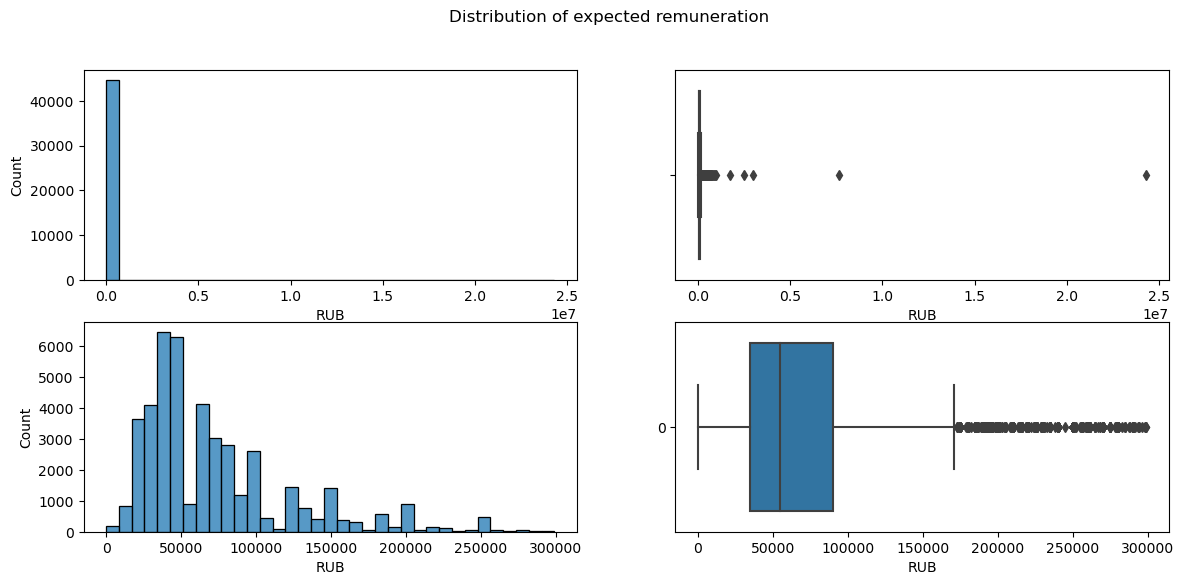

In [24]:
ser_salary = df['ЗП (руб)'].loc[(df['ЗП (руб)'] < 300_000)]

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
sns.histplot(data=df, x=df['ЗП (руб)'], bins=35, ax=axs[0,0]).set(xlabel='RUB')
sns.boxplot(data=df, x=df['ЗП (руб)'], ax=axs[0,1]).set(xlabel='RUB')
sns.histplot(data=ser_salary, bins=35, ax=axs[1,0]).set(xlabel='RUB')
sns.boxplot(data=ser_salary, orient='h', ax=axs[1,1]).set(xlabel='RUB')
fig.suptitle('Distribution of expected remuneration');

In [25]:
print('Mean age:', np.round(df['ЗП (руб)'].mean(), 1))
print('Median age:', np.round(df['ЗП (руб)'].median(), 1))
print('Mode age:', np.round(df['ЗП (руб)'].mode()[0], 1))
print('Min-max age:', np.round(df['ЗП (руб)'].min(), 1), '-', np.round(df['ЗП (руб)'].max(), 1))
print('IRQ:', np.round(df['ЗП (руб)'].quantile(0.25), 1), '-', np.round(df['ЗП (руб)'].quantile(0.75), 1))
print('Exp remuneration > 1 mil:', df[df['ЗП (руб)'] > 1_000_000].shape[0])

Mean age: 76533.5
Median age: 59019.0
Mode age: 50000.0
Min-max age: 1.0 - 24304876.0
IRQ: 37082.2 - 95000.0
Exp remuneration > 1 mil: 5


*Выводы:*  
По всей видимости соискатели не были ограничены в выборе ожидаемой заработной платы, о чем говорят минимальное и максимальное значение признака (1 рубль и 2,4 млн рублей, соответственно). Большинство соискателей ожидают заработную плату в размере от 37 до 95 тыс. рублей, при среднем значении 76,5 тыс. рублей. При рассмотрении признака в диапазоне до 300 тыс. рублей видно, что гистограмма ожидаемой заработной платы имеет сходство с логнормальным распределением.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

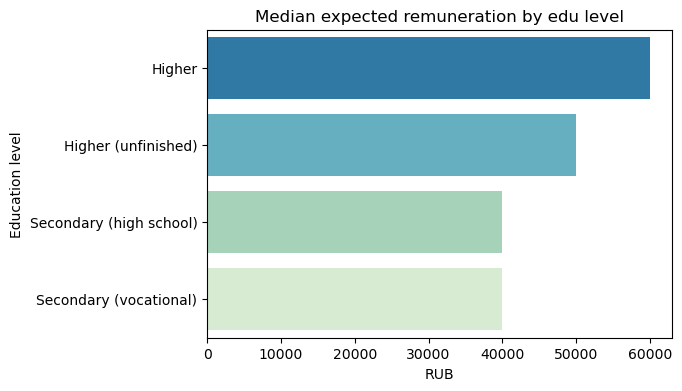

In [26]:
df_tmp = df[['ЗП (руб)', 'Образование']].query("`ЗП (руб)` < 1_000_000").groupby(by='Образование').median().reset_index()
df_tmp['Образование'] = pd.Series(['Higher', 'Higher (unfinished)', 'Secondary (high school)', 'Secondary (vocational)'])

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df_tmp, x=df_tmp['ЗП (руб)'], y=df_tmp['Образование'], palette='GnBu_r', ax=ax).set(
    title='Median expected remuneration by edu level', 
    xlabel='RUB', ylabel='Education level');

*Выводы:*  
Исходя из данных столбчатой диаграммы по медианной ожидаемой заработной плате в разрезе уровня образования можно сделать вывод о том, что получение дополнительного образования положительно влияет на предполагаемую в будущем заработную плату. При этом на более низком уровне образования факт завершения его не имеет значения, на более высоком уровне - оказывает прямое влияния на заработную плату.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

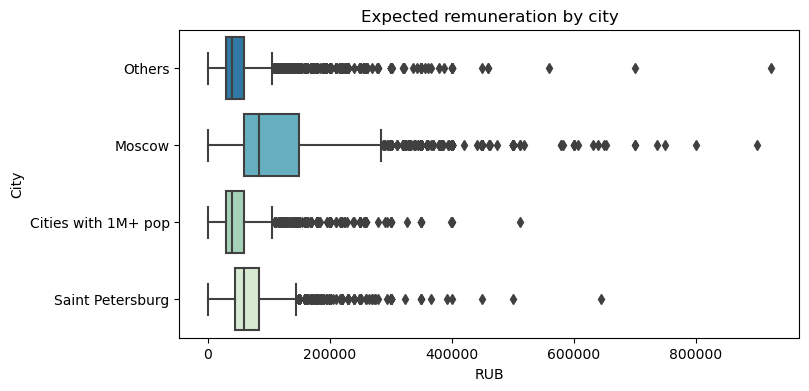

In [27]:
df_tmp = df[['ЗП (руб)', 'Город']].query("`ЗП (руб)` < 1_000_000")
df_tmp['Город'] = df_tmp['Город'].replace({'Москва': 'Moscow', 'Санкт-Петербург': 'Saint Petersburg', 'город-миллионник': 'Cities with 1M+ pop', 'другие':'Others'})

fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df_tmp, x=df_tmp['ЗП (руб)'], y=df_tmp['Город'], palette='GnBu_r', ax=ax).set(
    title='Expected remuneration by city', 
    xlabel='RUB', ylabel='City');

In [28]:
df[['ЗП (руб)', 'Город']].query("`ЗП (руб)` < 1_000_000").max()

ЗП (руб)   923,983.0000
Город            другие
dtype: object

*Выводы:*  
Ожидания по уровню заработанной платы довольно гомогенны по все территории Российской Федерации, за исключением Москва и Санкт Петербурга, где ожидаемая медианная заработная плата в 1,5 и 2 раза больше, чем в других городах и населенных пунктах. Кроме того, в указанных городах наблюдается наибольший разброс в зарплатных ожиданиях. Для всех городов наблюдаются выбросы, как слева (заработная плата равна нулю), так и слева.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

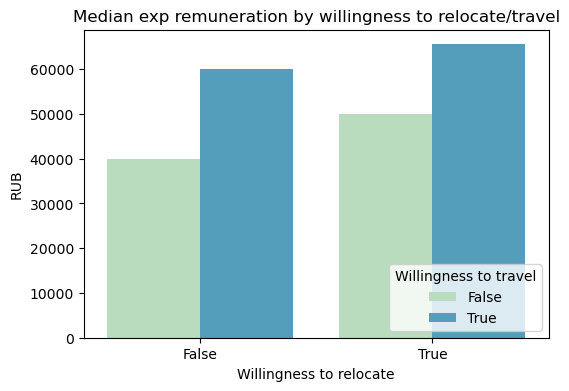

In [29]:
df_tmp = df[['ЗП (руб)', 'Готовность к переезду', 'Готовность к командировкам']].query("`ЗП (руб)` < 1_000_000").groupby(by=['Готовность к переезду', 
    'Готовность к командировкам']).median().reset_index()
df_tmp.columns = ['Willingness to relocate', 'Willingness to travel', 'RUB']

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df_tmp, x='Willingness to relocate', hue='Willingness to travel', y=df_tmp['RUB'], palette='GnBu', ax=ax).set(
    title='Median exp remuneration by willingness to relocate/travel')
sns.move_legend(ax, "lower right")

*Выводы:*  
В случае, если соискатель готов к переезду в другую локацию его ожидания по заработной плате увеличиваются на 25% при условии нежелания к командировкам и на 9% при готовности к ним. В целом чем большую гибкость готов обеспечить соискатель, тем большую заработную плату он ожидает взамен.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

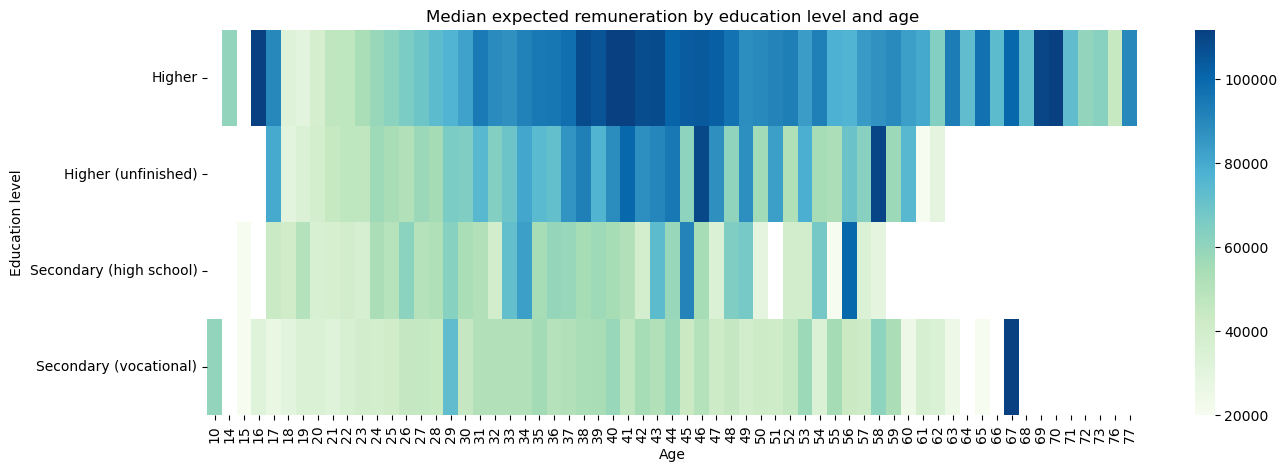

In [30]:
df_tmp = pd.pivot_table(df, values='ЗП (руб)', index='Образование', columns='Возраст')
df_tmp.index = ['Higher', 'Higher (unfinished)', 'Secondary (high school)', 'Secondary (vocational)']

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data=df_tmp, cmap='GnBu', cbar=True, robust=True, ax=ax).set(
    title='Median expected remuneration by education level and age', 
    xlabel='Age', ylabel='Education level');

*Выводы:*  
Ожидания соискателей со средним и средним специальным образованием не сильно изменяются с возрастом за исключением периода начала карьеры и в большинстве случаев соискатели со средним образованием ожидают незначительно больше, чем их коллеги со средним специальным образованием. Совсем другое поведение показывают соискатели с полученным высшим образованием: начиная с начала карьеры и до почти 45 лет их зарплатные ожидания увеличиваются с возрастом, после чего начинают медленное снижение в более пожилом возрасте. Для соискателей с незаконченным высшим образованием наблюдается схожая картина, но с более низким уровнем зарплатных ожиданий.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Work experience > age: 7


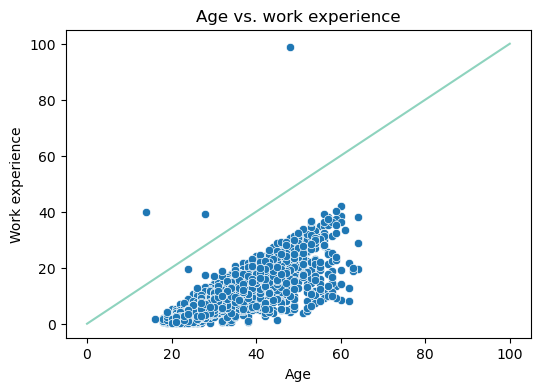

In [31]:
df_tmp = df.loc[:, ['Опыт работы (месяц)', 'Возраст']]
df_tmp = df_tmp.sample(frac=0.1, random_state=rng)
df_tmp['Опыт работы (лет)'] = df_tmp['Опыт работы (месяц)'] / 12
df_line = pd.DataFrame({'Age': np.arange(0, 101), 'WorkExp': np.arange(0, 101)})

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_tmp, x='Возраст', y='Опыт работы (лет)', ax=ax).set(title='Age vs. work experience', 
    xlabel='Age', ylabel='Work experience'
    )
sns.lineplot(data=df_line, x='Age', y='WorkExp', color='#8ED3BE');
print('Work experience > age:', df.query("`Опыт работы (месяц)`/12 > `Возраст`").shape[0])

*Выводы*  
В данных действительно присутствует несколько значений, которые не имеют смысла (опыт работы больше, чем возраст соискателя), требующие дополнительной обработки.

<u>Примечание:</u> для уменьшения размера файла-ноутбука на графике отражено лишь 10% от всех наблюдений.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


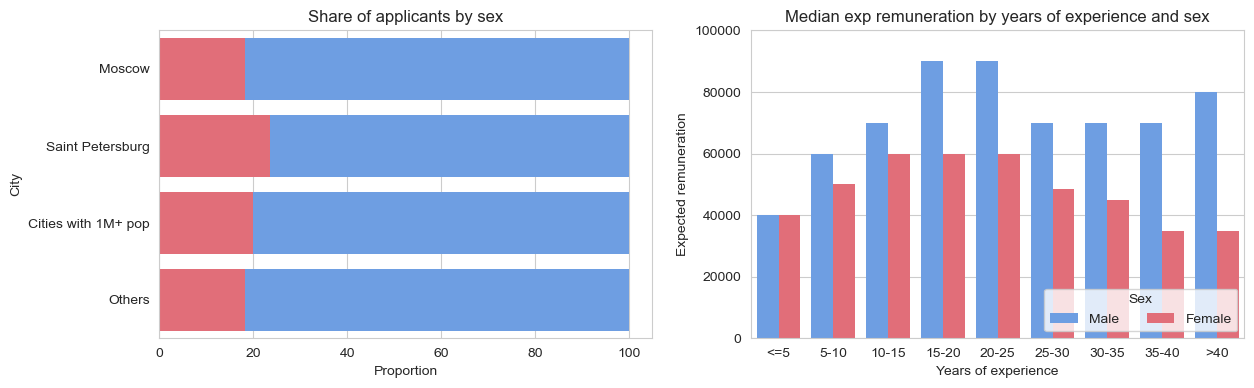

In [32]:
sns.set_style('whitegrid')
df_tmp = (df[['Город', 'Пол', 'Обновление резюме']].groupby(by=['Город', 'Пол']).count().loc[pd.IndexSlice[:, 'Ж'], :]['Обновление резюме'] 
    / df[['Город', 'Обновление резюме']].groupby(by=['Город']).count()['Обновление резюме'] * 100
    ).to_frame()
df_tmp['Total'] = 100
df_tmp = df_tmp.reset_index().drop(columns='Пол')
df_tmp.columns = ['City', 'Female', 'Total']
df_tmp['City'] = pd.Series(['Moscow', 'Saint Petersburg', 'Cities with 1M+ pop', 'Others'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(data=df_tmp, x='Total', y='City', color='#5B9BF5', linewidth=0, ax=ax1)
sns.barplot(data=df_tmp, x='Female', y='City', color='#F45B69', linewidth=0, ax=ax1).set(title='Share of applicants by sex', xlabel='Proportion')

exp_groups = ['<=5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '>40']
df_tmp = df.loc[:, ['Опыт работы (месяц)', 'Пол', 'ЗП (руб)']]
df_tmp['Опыт работы (год)'] = df_tmp['Опыт работы (месяц)'] / 12
df_tmp['Опыт работы (год)_'] = pd.cut(df_tmp['Опыт работы (год)'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 100], include_lowest=True, labels=exp_groups)

sns.barplot(data=df_tmp, x='Опыт работы (год)_', y='ЗП (руб)', hue='Пол', errorbar=None, estimator=np.median, 
    palette=['#5B9BF5', '#F45B69'], linewidth=0, ax=ax2).set(
        title='Median exp remuneration by years of experience and sex',
        xlabel='Years of experience',
        ylabel='Expected remuneration'
    )
ax2.set_ylim(top=100_000)
ax2.legend(title='Sex', ncols=2, loc='lower right', labels=['Male', 'Female']);

*Выводы*  
В целом по выборке доля соискателей женского пола составляет 19,1%. В разрезе городов самая низкая доля женщин, ищущих работу в IT отрасли, приходится на Москву. В столице эта доля составляет лишь 18,1%, что незначительно ниже доли в небольших городах (18,2%). В городах-миллионниках доля соискателей незначительно выше и находится на уровне 20%. Больше всего соискателей женского пола находится в Санкт-Петербурге с долей 23,5%. Низкая доля женщин-соискателей в Москве возможно обусловлена тем, что столица является центром притяжения внутренней миграции, и планируют и осуществляют переезд в другой город в основным мужчины, в том числе из Санкт-Петербурга, где уровень заработной платы находится на уровне между Москвой и городами-миллионниками.

В IT отрасли, так и в других секторах экономики, присутствует разрыв в оплате труда между мужчинами и женщинами, который можно проследить из ожиданий соискателей. За исключением совсем начинающих специалистов ожидаемая заработная плата мужчин выше ожиданий женщин для всех уровней опыта работа. Наибольший разрыв в ожидаемой заработной плате присутствует для соискателей с опытом работы от 15 до 25 лет, то есть на пике карьерных возможностей, а также для соискателей с опытом работы более 40 лет. При этом ожидания соискателей-мужчин с возрастом корректируются в нижнюю сторону, но остаются стабильными до конца карьеры. Для соискателей-женщин, с другой стороны, с возрастом зарплатные ожидания постоянно снижаются.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [33]:
print('Duplicated rows:', df.duplicated().sum())
df = df.drop_duplicates()

Duplicated rows: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [34]:
pd.DataFrame({
    'dtype': df.dtypes, 
    'obs': df.count(), 
    'nulls': df.isna().sum()
    }).query("obs != @df.shape[0]")

,dtype,obs,nulls
Последнее/нынешнее место работы,object,44582,1
Последняя/нынешняя должность,object,44581,2
Опыт работы (месяц),float64,44415,168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [35]:
df = df.dropna(axis='index', how='any', subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
df = df.fillna({'Опыт работы (месяц)': df['Опыт работы (месяц)'].median()})
print('Average work exp:', np.round(df['Опыт работы (месяц)'].mean()))

Average work exp: 114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [36]:
print('Removed outliers:', df.query("`ЗП (руб)` < 1_000 | `ЗП (руб)` > 1_000_000").index.size)
df = df.drop(df.query("`ЗП (руб)` < 1_000 | `ЗП (руб)` > 1_000_000").index)

Removed outliers: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [37]:
print('Removed outliers:', df.query("`Опыт работы (месяц)`/12 > `Возраст`").index.size)
df = df.drop(df.query("`Опыт работы (месяц)`/12 > `Возраст`").index)

Removed outliers: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

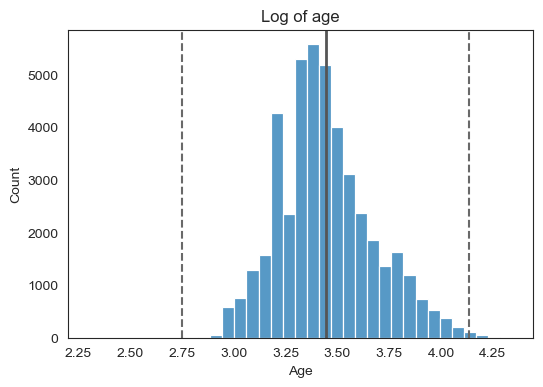

In [38]:
df_tmp = pd.DataFrame({'Age': df['Возраст'], 'Age (log)': np.log(df['Возраст'])})

sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df_tmp, x=df_tmp['Age (log)'], bins=35, ax=ax).set(title='Log of age', xlabel='Age')
ax.axvline(df_tmp['Age (log)'].mean(), linewidth=2, color='#555555')
ax.axvline(df_tmp['Age (log)'].mean() + 3*df_tmp['Age (log)'].std(), linewidth=1.5, linestyle='--', color='#696969')
ax.axvline(df_tmp['Age (log)'].mean() - 3*df_tmp['Age (log)'].std(), linewidth=1.5, linestyle='--', color='#696969');

df_tmp = df_tmp.query("`Age (log)` > `Age (log)`.mean() + 4*`Age (log)`.std() | `Age (log)` < `Age (log)`.mean() - 3*`Age (log)`.std()")

In [39]:
display(df_tmp)
print('Removed outliers:', df_tmp.index.size)
df = df.drop(df_tmp.index)

,Age,Age (log)
31137,15,2.7081
32950,15,2.7081
33654,10,2.3026


Removed outliers: 3


*Коммментарий:*  
Распределение логарифма возраста имеет положительную асимметрию, при котором правый хвост значительно длиннее левого. В качестве выбросов найдено три наблюдения соискателей в подростковом возрасте.

In [40]:
del ax, ax1, ax2, axs, col, col_names, df_line, df_tmp, exp_groups, fig, max_len, ser_salary